In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

load_dotenv()

True

In [2]:
# получаем датасеты, выводим статистику

train_df = pd.read_csv(os.path.join('..', os.getenv('TRAIN_DATA_PATH'), 'train.csv'))
test_df = pd.read_csv(os.path.join('..', os.getenv('TRAIN_DATA_PATH'), 'test.csv'))

display(train_df.shape)
display(train_df.head())
display(train_df.describe())
display(train_df['SalePrice'].describe())

(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

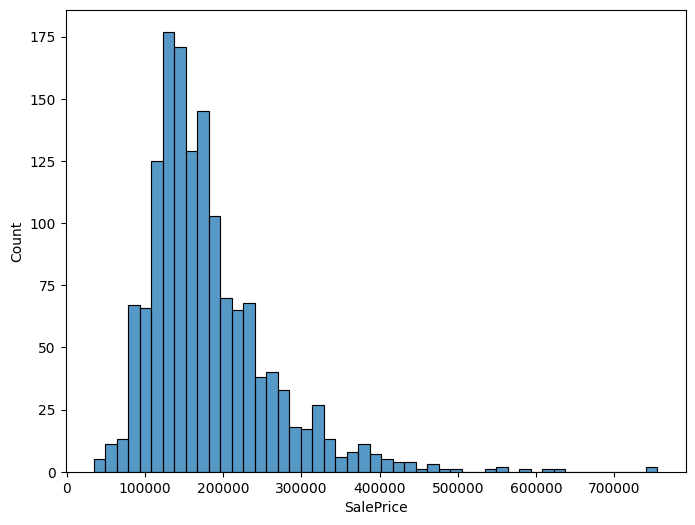

In [3]:
# визуализируем разброс по целевой переменной

plt.subplots(figsize=(8, 6))
sns.histplot(train_df['SalePrice'])

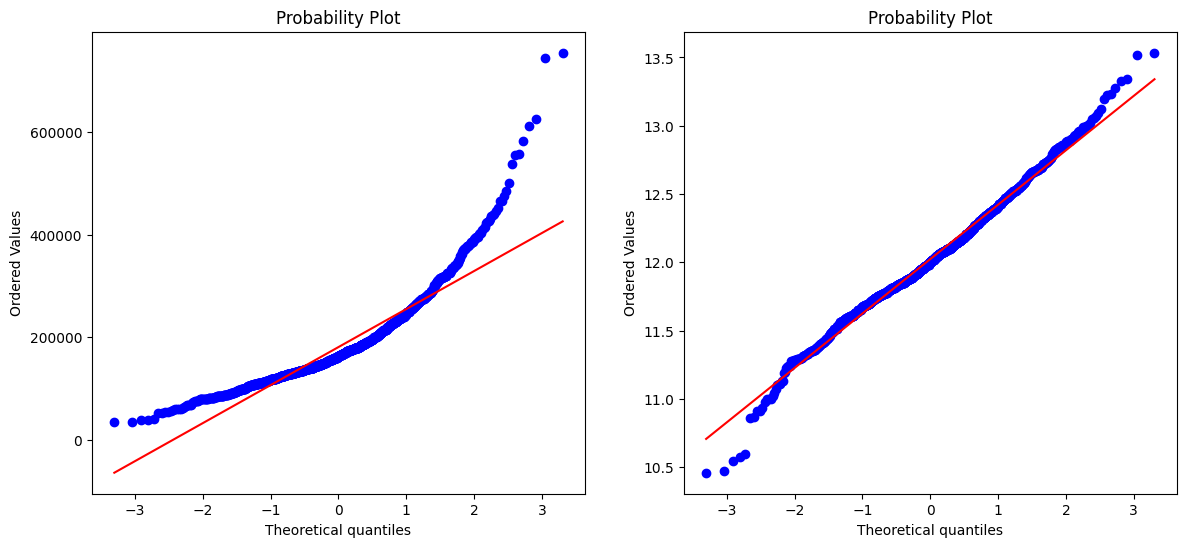

In [4]:
# логарифмируем целевую переменную для более равномерного распределения

fig = plt.figure(figsize = (14,6))

fig.add_subplot(1,2,1)
res = stats.probplot(train_df['SalePrice'], plot=plt)

fig.add_subplot(1,2,2)
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [5]:
# обернем датасет в класс, чтобы удобно работать с преобразованием

class Dataset():
    def __init__(self, dataset):
        self.origin_ds = dataset.drop(columns=['Id'], axis=1)

    def encode(self):
        encoder = LabelEncoder()
        for_encode_ds = self.origin_ds.copy()
        for ctg in self.getCategorical():
            for_encode_ds[ctg] = encoder.fit_transform(for_encode_ds[ctg])
        return for_encode_ds

    def stats(self):
        display(self.origin_ds.shape)
        display(self.origin_ds.head())
        display(self.origin_ds.describe())

    def clearEjection(self, column, index):
        self.origin_ds = self.origin_ds.drop(self.origin_ds[self.origin_ds[column] > index].index)

    def clearEmpty(self, percent):
        nullsValues = self.origin_ds.isnull().sum().sort_values(ascending=False)
        print('Пропущено значений:')
        for col in nullsValues.head(10).index:
            isNull = self.origin_ds[col].isnull().sum()
            print(col, isNull, '(' + str(round((isNull / self.origin_ds.shape[0]) * 100, 2)) + '%)')
        print('...')   

        for col in nullsValues.index:
            isNull = self.origin_ds[col].isnull().sum()
            nullsPercent = round((isNull / self.origin_ds.shape[0]) * 100, 2)
            if nullsPercent >= percent:
                self.origin_ds = self.origin_ds.drop(columns=[col], axis=1)
            else:
                if self.origin_ds[col].dtype == 'object':
                    self.origin_ds[col].fillna(value='UNKNOWN', inplace=True)
                else:
                    self.origin_ds[col].fillna(value=self.origin_ds[col].median(), inplace=True)

    def getCategorical(self):
        return self.origin_ds.dtypes[self.origin_ds.dtypes == 'object'].index

    def getDummies(self):
        self.origin_ds = pd.get_dummies(self.origin_ds, 
                                        columns=self.getCategorical(), 
                                        drop_first=False)

    @property
    def ds(self):
        return self.origin_ds

In [6]:
# создадим инстанс класса

train_ds = Dataset(train_df)

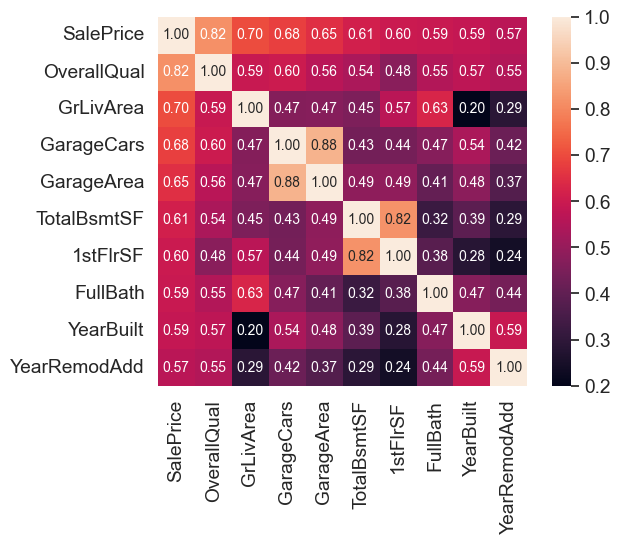

In [7]:
# посмотрим с какими признаками коррелирует цена

"""
Т.к. функция corr работает с числовыми значениями,
попробуем декодировать их с LabelEncoder,
чтобы не потерять корреляцию по нечисловым столбцам
"""
encode_ds = train_ds.encode()

k = 10
cols = encode_ds.corr(numeric_only=True).nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(encode_ds[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

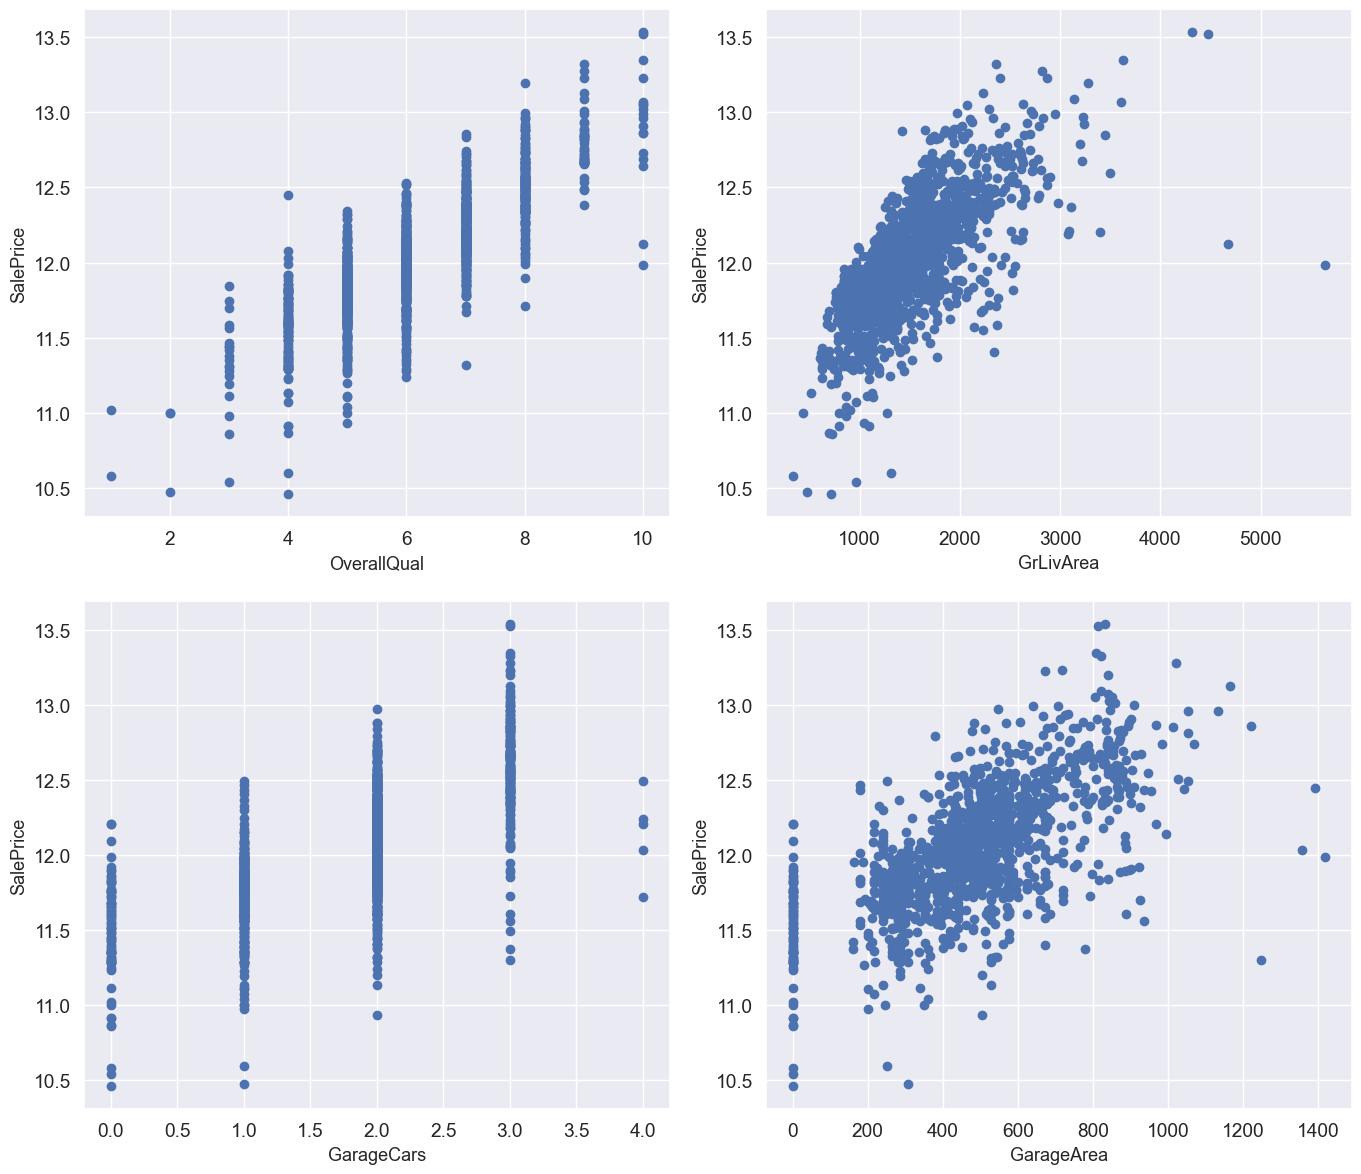

In [8]:
# возьмем 4 признака и проверим на выбросы

fig = plt.figure(figsize = (14,12))

for i, col in enumerate(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']):
    plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    plt.scatter(x = train_df[col], y = train_df['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(col, fontsize=13)

In [9]:
# очистим данные от выбросов

train_ds.clearEjection('OverallQual', 9)
train_ds.clearEjection('GrLivArea', 4000)
train_ds.clearEjection('GarageCars', 3.5)
train_ds.clearEjection('GarageArea', 1100)

train_ds.stats()

(1433, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1433.000000,1176.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1426.000000,1433.000000,1433.000000,...,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,57.006281,69.339286,10367.569435,6.050244,5.579902,1971.013957,1984.609211,97.905330,429.979763,47.050244,...,92.859735,45.268667,22.072575,3.473831,14.939986,2.088625,43.917655,6.323796,2007.816469,12.011185
std,42.397650,22.965907,9881.992588,1.315035,1.111488,29.971049,20.654939,168.879511,421.007292,162.190135,...,124.793922,63.577195,60.867463,29.588652,55.116654,35.665831,500.557791,2.703680,1.331487,0.384889
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.771444
50%,50.000000,69.000000,9400.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,378.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.992267
75%,70.000000,80.000000,11428.000000,7.000000,6.000000,2000.000000,2004.000000,159.500000,699.000000,0.000000,...,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.259618
max,190.000000,313.000000,215245.000000,9.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.323929


In [10]:
# объединим датасеты, чтобы не путаться с категориальными признаками

train_dataset = train_ds.ds

all_data = pd.concat([train_dataset, test_df], axis=0)

all_ds = Dataset(all_data)

all_ds.clearEmpty(80)

all_ds.getDummies()

all_ds.stats()

Пропущено значений:
PoolQC 2884 (99.72%)
MiscFeature 2788 (96.4%)
Alley 2695 (93.19%)
Fence 2324 (80.36%)
SalePrice 1459 (50.45%)
FireplaceQu 1416 (48.96%)
LotFrontage 484 (16.74%)
GarageCond 159 (5.5%)
GarageFinish 159 (5.5%)
GarageQual 159 (5.5%)
...


(2892, 294)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_UNKNOWN,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_UNKNOWN,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,...,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000
mean,57.193983,68.791840,10090.900069,6.064661,5.566736,1971.187414,1984.131743,98.560512,434.608575,49.841632,...,0.079184,0.002420,0.000346,0.867911,0.065353,0.004149,0.007953,0.015906,0.825380,0.081259
std,42.567236,20.683869,7799.412898,1.377653,1.112509,30.178441,20.897940,172.865686,438.494780,169.658025,...,0.270072,0.049147,0.018595,0.338646,0.247190,0.064293,0.088839,0.125133,0.379707,0.273279
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7440.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,68.000000,9399.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,78.000000,11475.750000,7.000000,6.000000,2000.000000,2004.000000,160.250000,728.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# снова разделим на тренировочную и тестовую выборки

all_dataset = all_ds.ds

train_data = all_dataset.iloc[:1460, :]
test_data = all_dataset.iloc[1460:, :]

# удаляем лишний столбец из тестового набора
test_data.drop(columns=['SalePrice'], axis=1, inplace=True)

/var/folders/6m/2v68mnys4xbfjfdql288nb100000gn/T/ipykernel_73649/1169185937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns=['SalePrice'], axis=1, inplace=True)


In [12]:
# разбиваем датасет

y = train_data['SalePrice']

train_data.drop(columns=['SalePrice'], axis=1, inplace=True)

X = train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/var/folders/6m/2v68mnys4xbfjfdql288nb100000gn/T/ipykernel_73649/3236388710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=['SalePrice'], axis=1, inplace=True)


In [13]:
# подготовим модель

model = xgb.XGBRegressor(n_estimators=340, max_depth=2, learning_rate=0.2)

In [14]:
# запустим обучение

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=340, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
# посмотрим на качество обучения

print(model.score(X_test, y_test))

0.8614674511681522
